In [72]:
import math
import numpy as np
from pint import UnitRegistry
unit = UnitRegistry()
unit.formatter.default_format = "~"


# Parameters
spring_constant = 1.1 * 4 * unit.N / unit.mm
spring_length_resting = 112 * unit.mm

weight_total = 14 * unit.kg

dampening = 1 * unit.N / (unit.m / unit.s)

def spring_length_at(weight):
    return (weight * unit.standard_gravity / spring_constant + spring_length_resting).to(unit.mm)

def resonant_freq_at(weight):
    return (1 / (2 * math.pi) * np.sqrt(spring_constant / weight)).to(unit.Hz)

spring_length = spring_length_at(weight_total)
f0 = resonant_freq_at(weight_total)

print(f"Length: {spring_length:~.1f}")
print(f"Freq:   {f0:~.3f}")

Length: 143.2 mm
Freq:   2.822 Hz


In [73]:
def lehr_dampening_factor(d, k, m):
    return d / (2 * np.sqrt(m * k))

lehr_dampening = lehr_dampening_factor(dampening, spring_constant, weight_total)
lehr_dampening.ito_reduced_units()
lehr_dampening

<Quantity(0.00201455741, 'dimensionless')>

Text(0.5, 0, 'Excitation Frequency')

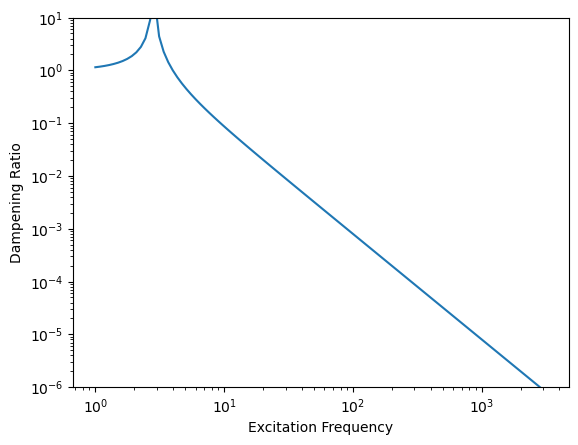

In [74]:
def amplitude_ratio(lehr, f0, f):
    eta = f / f0
    return 1 / np.sqrt((1 - eta**2)**2 + (2 * eta * lehr)**2)

f_in = np.logspace(0, 3.5, 100) * unit.Hz
ratio = amplitude_ratio(lehr_dampening, f0, f_in)

import matplotlib.pyplot as plt
plt.plot(f_in, ratio)
plt.xscale('log')
plt.ylim(0.000001, 10)
plt.yscale('log')
plt.ylabel("Dampening Ratio")
plt.xlabel("Excitation Frequency")